In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import PIL
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 

In [2]:
#download flower datasets
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir =tf.keras.utils.get_file('flower_photos',origin=dataset_url,untar=True)
data_dir =pathlib.Path(data_dir)

228813984/228813984 [==============================] - 10s 0us/step


In [3]:
# berapa jumlah gambar yang ditarik
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


sebuah data sets terdiri dari 3670 images bunga yang di bagi kedalam sebuah 5 sub direktori : dandelion,roses,tulips,daisy, dan sunflowers

In [4]:
print(os.listdir(data_dir))

['tulips', 'daisy', 'dandelion', 'LICENSE.txt', 'sunflowers', 'roses']


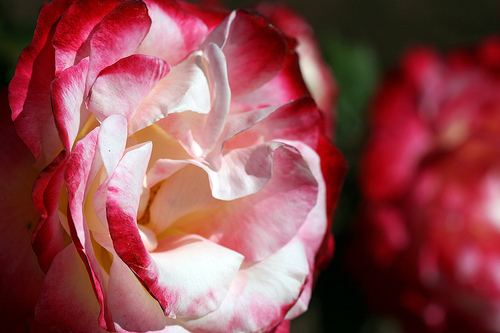

In [5]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(roses[1])

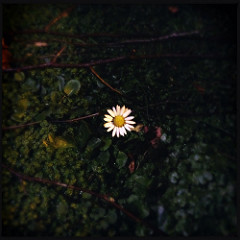

In [6]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(daisy[2])

ukuran dari setiap gambar sangat berbeda maka dari itu diperlukan untuk melakukan pross resize

Perbandingan sebuah training agar setiap train melakukan validasi dengan 80:20 dari 3670 data

In [7]:
batch_size = 32
img_height = 180
img_width =180
# train image
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed=123,
    image_size= (img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [8]:
# validation image
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


Train :
3670 x 80% = 2936

Validation :
3670 x 20% = 734

In [9]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


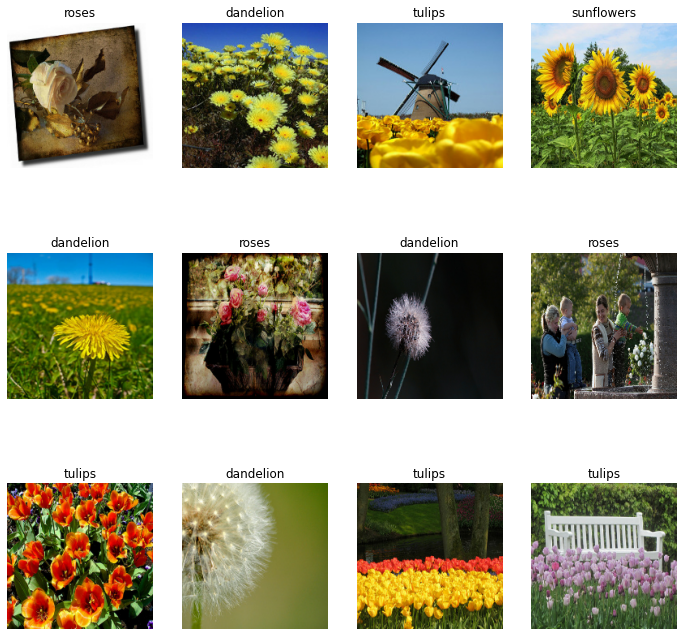

In [10]:
# sample images
plt.figure(figsize=(12,12))
for images, labels in train_ds.take(1): #akan diambil satu setuap subclass
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [11]:
num_classes= len(class_names)
num_classes

5

In [12]:
model  = Sequential([
    #input layers untuk rescaling gambar 255 byte
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height,img_width,3)),
    #layers conversi sebuah bentuk menjadi 2d
    # setiap layers jumlah progetron exponenial dengan jumlah TLU 3 
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    
    # preprocesing data to 1D, default 28x28
    layers.Flatten(),
    # make hidden layers to computation sebuah classifier per predict proba setiap instance terhadap satu label num_class=>5
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,activation='softmax')#multiclass
])

In [13]:
# compile the model
#backward  -> loss menggunakan sebuah crossentorpy dengan optimasi 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [15]:
# train
epochs=15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 16s 71ms/step - loss: 1.2112 - accuracy: 0.4959 - val_loss: 1.0792 - val_accuracy: 0.5354
Epoch 2/15
92/92 [==============================] - 7s 67ms/step - loss: 0.9222 - accuracy: 0.6505 - val_loss: 0.9052 - val_accuracy: 0.6213
Epoch 3/15
92/92 [==============================] - 7s 67ms/step - loss: 0.7559 - accuracy: 0.7088 - val_loss: 0.8444 - val_accuracy: 0.6826
Epoch 4/15
92/92 [==============================] - 7s 67ms/step - loss: 0.5263 - accuracy: 0.8113 - val_loss: 0.9027 - val_accuracy: 0.6662
Epoch 5/15
92/92 [==============================] - 7s 67ms/step - loss: 0.3264 - accuracy: 0.8815 - val_loss: 1.0340 - val_accuracy: 0.6540
Epoch 6/15
92/92 [==============================] - 7s 67ms/step - loss: 0.1950 - accuracy: 0.9363 - val_loss: 1.3230 - val_accuracy: 0.6322
Epoch 7/15
92/92 [==============================] - 7s 67ms/step - loss: 0.0911 - accuracy: 0.9710 - val_loss: 1.4019 - val_accuracy: 0.6676
Epoch 8/15
92/92 [=====

In [16]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.211231,0.495913,1.079204,0.535422
1,0.922233,0.650545,0.905247,0.621253
2,0.755856,0.708787,0.844419,0.682561
3,0.526344,0.811308,0.902662,0.666213
4,0.326409,0.881471,1.034024,0.653951
5,0.194992,0.936308,1.322995,0.632153
6,0.091085,0.971049,1.401870,0.667575
7,0.050545,0.990123,1.573924,0.678474
8,0.083137,0.974796,1.299637,0.647139
9,0.048721,0.988079,1.673178,0.636240


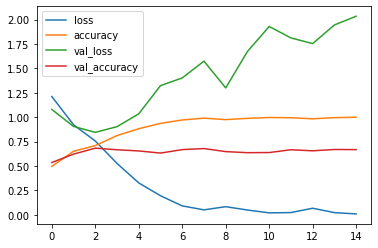

In [17]:
plt.plot(pd.DataFrame(history.history))
plt.grid(False)
plt.legend(['loss','accuracy','val_loss','val_accuracy'])
plt.show() 